In [12]:
import mib as mb1
import mib_v2_3 as mb
import matplotlib.pyplot as plt
import time
from itertools import product
import tracemalloc

# Test 1

## Planteamiento
Comparar rendimiento del mib1.0 contra el mib2.0 con problema pequeño y con tres eventon con distribuciones uniformes.
Se hara el test 100 veces y en cada iteración la cardinalidad de las tres variables crecera en 1, iniciando por cardinalidad de uno.

### Especificación

#### Variables
$A = \{0, 2, ..., n-1\}$

$B = \{0, 2, ..., n-1\}$

$C = \{0, 2, ..., n-1\}$

#### Descomposición de la conjunta
$P(ABC) = P(A)P(B|A)P(C|AB)$

$\;\;\;\;\;\;\;\;\;\;\;\;$<img src="./P(ABC).jpg" width=200/>

#### Formas
$P(A)$, $P(B|A)$ y $P(C|AB)$ serán distribuciones uniformes.

## MIB 1.0

## MIB 2.0

In [86]:
n = 100
timesM = []
memoryM = []
timesC = []
memoryC = []


for i in range(n):
    Events = set([x for x in range(i+1)])
    A = mb.Var('A',Events)
    B = mb.Var('B',Events)
    C = mb.Var('C',Events)
        
    # Generación de distribuciones de probabilidad (Distribuciones uniformes).
    dA = {}
    dB_A = {}
    dC_AB = {}
    value = 1 / (i+1)
    for x in range(i+1):
        dA[(x,)] = value
        dB_A[(x,)] = {}
        for y in range(i+1):
            dB_A[(x,)][(y,)] = value
            dC_AB[(x,y)] = {}
            for z in range(i+1):
                dC_AB[(x,y)][(z,)] = value
        
    PA = mb.Distrib(set([A]),dA, ('A'))
    PB_A = mb.CondDistrib(set([B]),set([A]),dB_A, ('B'), ('A'))
    PC_AB = mb.CondDistrib(set([C]),set([A,B]),dC_AB, ('C'), ('A','B'))
        
    # Probabilidad conjunta (especificación).
    PABC = mb.Specification(set([A,B,C]), set([PA,PB_A,PC_AB]))
        
    # Pregunta para hacer las consultas sobre P(ABC).
    Q_ABC = mb.Question(PABC)
        
    #Inferencia de P(B)
    tracemalloc.start()
    
    inicio = time.time()
    PB = Q_ABC.DistributionQuery(set([B])) 
    fin = time.time()
    
    memoria_actual, memoria_pico = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tiempo_ejecucion = fin - inicio
    
    timesM.append(tiempo_ejecucion)
    memoryM.append(memoria_pico) 
    print(i)

{'A': <mib_v2_3.Var object at 0x724c684e7d90>, 'B': <mib_v2_3.Var object at 0x724c684e7e50>, 'C': <mib_v2_3.Var object at 0x724c684e7850>}
B A
C ('A', 'B')
0
{'B': <mib_v2_3.Var object at 0x724c684fbfd0>, 'C': <mib_v2_3.Var object at 0x724c684fb7c0>, 'A': <mib_v2_3.Var object at 0x724c684fb9d0>}
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
1
{'C': <mib_v2_3.Var object at 0x724c684fbd00>, 'A': <mib_v2_3.Var object at 0x724c684fb910>, 'B': <mib_v2_3.Var object at 0x724c684fbe50>}
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C ('A', 'B')
B A
C

KeyboardInterrupt: 

## Datos obtenidos

### Tiempos de inferencia para $P(B)$

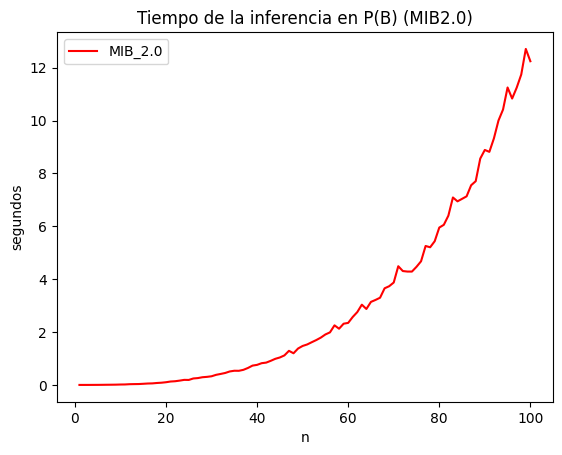

In [ ]:
xn = [i+1 for i in range(n)]
fig, ax = plt.subplots()

# MIB_2.0
ax.plot(xn, timesM, color='r',label = 'MIB_2.0')
ax.set_title("Tiempo de la inferencia en P(B) (MIB2.0)")

ax.set_xlabel("n")
ax.set_ylabel("segundos")
ax.legend(loc = 'upper left')

# Mostrar las gráficas
plt.show()

### Tiempos de inferencia para $P(C|AB)$

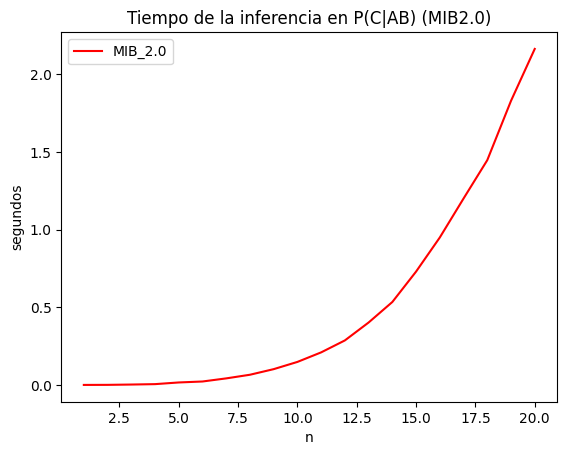

In [ ]:
xn = [i+1 for i in range(n)]
fig, ax = plt.subplots()

# MIB_2.0
ax.plot(xn, timesC, color='r',label = 'MIB_2.0')
ax.set_title("Tiempo de la inferencia en P(C|AB) (MIB2.0)")

ax.set_xlabel("n")
ax.set_ylabel("segundos")
ax.legend(loc = 'upper left')

# Mostrar las gráficas
plt.show()

# Test 2

# Test 3

# Test 4
Problema de autoria de textos

## Planteamiento

## Especificación 

### Variables
- $A$ : Variable para los autores
- $T$ : Variable para los tipos de textos
- $W_I$ : Variable para las palabras

**Variable $A$**

- $A = $ Alfonso Reyes
- $A = $ Esopo
- $A = $ Fuentes
- $A = $ García Márquez
- $A = $ Gibran
- $A = $ La Fontanie
- $A = $ Onetti
- $A = $ Quiroga
- $A = $ Rulfo
- $A = $ Saramago

**Variable $T$**

- $T = $ minicuento
- $T = $ cuento
- $T = $ fábula

**Variable $W_i$**

- $W_i = \{0,1\}$, donde cada $W_i$ representa una variable para una palabra y sus representaciones númericas son las siguientes:
- $W_i = 0$ -> la palabra no esta.
- $W_i = 1$ -> la palabra si esta.

### Suponiendo un modelo de descomposición exacta:
$P(A)P(T|A)\displaystyle \prod_{i=0}^{n} P(W_i|AT)$

## Implementación 

In [13]:
import tpproc as tp
from collections import Counter  #regresa un diccionario con conteos
import glob
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import OrderedDict #diccionarios ordenados
import numpy as np

[nltk_data] Downloading package punkt to /home/roberto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Obtención de datos para el test

In [14]:
archivos = glob.glob('./Train/*/*')
archivos,nombres = tp.carga_cuentos(archivos)
df_train = tp.lee_cuentos(archivos)
df_train.head()

leyendo...
tamaño del contenido de archivos cargados:             1 KB


,titulo,tipo,autor,texto
0,la luz es como el agua,cuento,gabriel garcía márquez,navidad niños volvieron pedir bote remos acuer...
1,un niño como yo,minicuento,gabriel garcía márquez,niño cinco años perdido madre muchedumbre feri...
2,la fotogenia del fantasma,minicuento,gabriel garcía márquez,fantasmas acomodándose nuevas circunstancias e...
3,el drama del desencantado,minicuento,gabriel garcía márquez,drama desencantado arrojó calle décimo piso me...
4,el almohadón de plumas,cuento,horacio quiroga,luna miel largo escalofrío rubia angelical tím...


In [15]:
archivos = glob.glob('./Test/*')
archivos,nombres = tp.carga_cuentos(archivos)
df_test = tp.lee_cuentos(archivos,test=True)
df_test.head()

leyendo...
tamaño del contenido de archivos cargados:             0 KB


,titulo,texto
0,la melancolía del viajero,veces vuelven largo viaje conservan toda vida ...
1,el águila de ala cortada y la zorra,cierto día hombre capturó águila cortó alas so...
2,los dos cazadores,cierto día mayo alegría tristeza encontraron o...
3,maravillas de la voluntad,tres punto don pedro llegaba mesa saludaba cad...
4,la escopeta,noche cerrada estiré brazo encender lámpara me...


#### Data Frames de trabajo

In [16]:
s = df_train.texto.str.cat(sep=' ').split()
print(len(s))
conteos=Counter(s)
nuevo_vocabulario = list(set([palabra for palabra in s if conteos[palabra] <= 10 and conteos[palabra]>1 ]))
print(len(nuevo_vocabulario))

7210
1023


In [17]:
df_train_T = df_train.copy()
df_train_T['nuevo_texto'] = df_train_T.texto.str.split().\
    apply(lambda texto: [w for w in texto if w in nuevo_vocabulario]).\
    apply(lambda x : ' '.join(x))
df_train_T['Conteos']=df_train_T.nuevo_texto.str.split().apply(Counter)


df_train_T.head()

,titulo,tipo,autor,texto,nuevo_texto,Conteos
0,la luz es como el agua,cuento,gabriel garcía márquez,navidad niños volvieron pedir bote remos acuer...,niños volvieron pedir bote remos papá cartagen...,"{'niños': 7, 'volvieron': 1, 'pedir': 2, 'bote..."
1,un niño como yo,minicuento,gabriel garcía márquez,niño cinco años perdido madre muchedumbre feri...,cinco perdido madre muchedumbre acerca agente ...,"{'cinco': 1, 'perdido': 1, 'madre': 1, 'muched..."
2,la fotogenia del fantasma,minicuento,gabriel garcía márquez,fantasmas acomodándose nuevas circunstancias e...,nuevas marqués cerca hecho fantasma fantasma f...,"{'nuevas': 1, 'marqués': 3, 'cerca': 1, 'hecho..."
3,el drama del desencantado,minicuento,gabriel garcía márquez,drama desencantado arrojó calle décimo piso me...,calle piso medida caía iba viendo través venta...,"{'calle': 2, 'piso': 1, 'medida': 1, 'caía': 1..."
4,el almohadón de plumas,cuento,horacio quiroga,luna miel largo escalofrío rubia angelical tím...,largo rubia tímida duro marido quería embargo ...,"{'largo': 6, 'rubia': 1, 'tímida': 1, 'duro': ..."


In [18]:
s=df_test.texto.str.cat(sep=' ').split()
print(len(s))
conteos=Counter(s)
nuevo_vocab = list(set([palabra for palabra in s if conteos[palabra] <= 10 and conteos[palabra]>1 ]))
print(len(nuevo_vocab))

2224
336


In [19]:
df_test_T = df_test.copy()
df_test_T['nuevo_texto']=df_test_T.texto.str.split().\
    apply(lambda texto: [w for w in texto if w in nuevo_vocab]).\
    apply(lambda x : ' '.join(x))
df_test_T['nuevo_total']=df_test_T.nuevo_texto.str.split().apply(len)
df_test_T['Conteos']=df_test_T.nuevo_texto.str.split().apply(Counter)


df_test_T.head()

,titulo,texto,nuevo_texto,nuevo_total,Conteos
0,la melancolía del viajero,veces vuelven largo viaje conservan toda vida ...,veces largo viaje toda vida sitio todas asisti...,78,"{'veces': 1, 'largo': 1, 'viaje': 1, 'toda': 1..."
1,el águila de ala cortada y la zorra,cierto día hombre capturó águila cortó alas so...,cierto hombre capturó águila alas junto todas ...,36,"{'cierto': 1, 'hombre': 2, 'capturó': 2, 'águi..."
2,los dos cazadores,cierto día mayo alegría tristeza encontraron o...,cierto mayo alegría tristeza lago junto tranqu...,74,"{'cierto': 1, 'mayo': 2, 'alegría': 4, 'triste..."
3,maravillas de la voluntad,tres punto don pedro llegaba mesa saludaba cad...,don pedro mesa cada tomaba café cigarrillo tom...,111,"{'don': 8, 'pedro': 8, 'mesa': 1, 'cada': 3, '..."
4,la escopeta,noche cerrada estiré brazo encender lámpara me...,noche brazo encender mesa necesario alba corre...,76,"{'noche': 1, 'brazo': 1, 'encender': 2, 'mesa'..."


#### Tamaño del vocabulario conjunto (total de palabras)

In [20]:
vocabulario = list(set(nuevo_vocabulario+nuevo_vocab))
print(len(vocabulario))

1207


In [21]:
voc_dict = OrderedDict(zip(vocabulario,range(len(vocabulario))))
v = list(voc_dict.keys())

#### Conteos

In [22]:
# Ocurrencias de cada autor y conteos de ocurrencias y de número de autores
oc_autor = Counter(df_train_T.autor)
tot_oc_aut = np.sum(list(oc_autor.values()))
tot_autores = len(oc_autor)

# Ocurrencias de cada tipo y conteos de ocurrencias y de número de tipos
oc_tipo = Counter(df_train_T.tipo)
tot_oc_tipo = np.sum(list(oc_tipo.values()))
tot_tipos = len(oc_tipo)

### Creación de variables

In [23]:
# Autor
autor_val = dict(zip(oc_autor.keys(),range(len(oc_autor.keys()))))
val_autor = dict(zip(range(len(oc_autor.keys())),oc_autor.keys()))
A = mb.Var('A',set(oc_autor.keys()))
# Tipos
tipo_val = dict(zip(oc_tipo.keys(),range(len(oc_tipo.keys()))))
val_tipo = dict(zip(range(len(oc_tipo.keys())),oc_tipo.keys()))
T = mb.Var('T',set(oc_tipo.keys()))

# Palabras
W = {}
for w in voc_dict:    # vocabulario reducido
    W[w] = mb.Var(w,set([0,1]))

### Identificación de parámetros (estadísticas)

### Método:

1. Descomposición exacta: $P(A)P(T|A)P(W|AT)$
2. Calcular las estadísticas por cada distribución de la descomposición
3. Para la variable Autor $P(A)$:
    - 3.1 Contar el número total de ocurrencias de autores en Train: $n_a$.
    - 3.2 Contar el número de ocurrencias de cada autor en Train: $n^i$.
    - 3.3 Dividir este número entre el número total de ocurrencias de autores en Train: $\displaystyle \frac{n^i}{n_a}$.
4. Para la variable Tipo $P(T|A)$:
    - 4.1 Obtener el conjunto de autores (valores únicos) $a$; entradas a la Tabla.
    - 4.2 Obtener el conjunto de tipos (valores únicos) $j$; estas son las salidas de la Tabla.
    - 4.3 Calcular el producto cartesiano de las combinaciones posibles (a,j).
    - 4.4 Contar el número de ocurrencias totales de cada $j$ por cada autor: $n^j_a$.
    - 4.5 Dividir este número entre el número total de tipos por autor: $\displaystyle \frac{n^j_a}{\sum n^j_a}$.
    - 4.6 Aplicar la corrección de Laplace para evitar probabilidades en $0$.
5. Para las variables W (palabras) $P(W|AT)$: **NOTA** se trata de calcular N Tablas, donde N es el tamaño del vocabulario.
    - 5.1 Calcular el producto cartesiano de las combinaciones posibles (a,j); estas son las entradas a cada Tabla.
    - 5.2 Por cada combinación, calcular la probabilidad de cada palabra del vocabulario, en función de su ocurrencia en esa combinación, aplicando la corrección de Laplace. 

##### Distribución P(A)
- Contar el número total de ocurrencias de autores en Train: $n_a$: _tot_oc_aut_
- Contar el número de ocurrencias de cada autor en Train: $n^i$: _oc_autor_ 
- Dividir este número entre el número total de ocurrencias de autores en Train: $\displaystyle \frac{n^i}{n_a}$

In [24]:
n_= []
for autor in oc_autor:
    n_.append(((autor,),oc_autor[autor]/tot_oc_aut))

#Dicionario de valores de probabilidad
dA = dict(n_)
#Distribución de probabilidad
PA = mb.Distrib(vars=set([A]), table = dA, columns=('A',))
print(A.getValues())
PA.print_table()

['esopo', 'jean de la fontaine', 'juan rulfo', 'gabriel garcía márquez', 'carlos fuentes', 'juan carlos onetti', 'josé saramago', 'gibrán jalil gibrán', 'horacio quiroga', 'alfonso reyes']
{('gabriel garcía márquez',): 0.13333333333333333, ('horacio quiroga',): 0.06666666666666667, ('carlos fuentes',): 0.06666666666666667, ('esopo',): 0.1, ('alfonso reyes',): 0.13333333333333333, ('jean de la fontaine',): 0.13333333333333333, ('gibrán jalil gibrán',): 0.16666666666666666, ('juan carlos onetti',): 0.06666666666666667, ('josé saramago',): 0.06666666666666667, ('juan rulfo',): 0.06666666666666667}


#### Distribución P(T|A)
   - Obtener el conjunto de autores (valores únicos) $a$; entradas a la Tabla: _df_train.autor_
   - Obtener el conjunto de tipos (valores únicos) $j$; estas son las salidas de la Tabla: _df_train.tipo_ 
   - Calcular el producto cartesiano de las combinaciones posibles (a,j): _pares_ta_
   - Contar el número de ocurrencias totales de cada $j$ por cada autor: $n^j_a$: _conteo_pares_
   - Dividir este número entre el número total de tipos por autor: $\displaystyle \frac{n^j_a}{\sum n^j_a}$.
   - Aplicar la corrección de Laplace para evitar probabilidades en $0$.

In [25]:
# Ocurrencias (conteos) de cada combinación (tipo,autor)
conteo_pares = Counter(zip(df_train_T.autor,df_train_T.tipo))
# print(conteo_pares)

# Combinaciones (tipo,autor)
autores = list(set(df_train_T.autor))
tipos = list(set(df_train_T.tipo))

dT_A = {}

for autor, tipo in product(*[autores,tipos]):
    par = (autor, tipo)
    ak = (autor,)
    
    if ak in dT_A.keys():
        if par in conteo_pares.keys():
            dT_A[ak][(tipo,)] = conteo_pares[par]
        else:
            dT_A[ak][(tipo,)] = 0 
    else:
        if par in conteo_pares.keys():
            dT_A[ak] = {(tipo,): conteo_pares[par]}
        else:
            dT_A[ak] = {(tipo,): 0}


# Corrección de Laplace en el caso general
# Se corrige la misma tabla que se senvía como argumento; no se crea una nueva.
def Laplace_gral(tabla):
    n = len(tabla[list(tabla.keys())[0]]) 
    for k in tabla.keys():
        registro = tabla[k]
        n_j = np.sum(list(registro.values()))
        for i in registro.keys():
            pb = (registro[i] + 1)/(n_j+n)
            tabla[k][i]=pb
    return

Laplace_gral(dT_A)

PT_A = mb.CondDistrib(set([T]), set([A]), dT_A, (T.getName(),), (A.getName(),))

In [26]:
PT_A.print_table()

{('esopo',): {('fábula',): 0.6666666666666666, ('cuento',): 0.16666666666666666, ('minicuento',): 0.16666666666666666}, ('jean de la fontaine',): {('fábula',): 0.14285714285714285, ('cuento',): 0.14285714285714285, ('minicuento',): 0.7142857142857143}, ('juan rulfo',): {('fábula',): 0.2, ('cuento',): 0.6, ('minicuento',): 0.2}, ('gabriel garcía márquez',): {('fábula',): 0.14285714285714285, ('cuento',): 0.2857142857142857, ('minicuento',): 0.5714285714285714}, ('carlos fuentes',): {('fábula',): 0.2, ('cuento',): 0.4, ('minicuento',): 0.4}, ('juan carlos onetti',): {('fábula',): 0.2, ('cuento',): 0.6, ('minicuento',): 0.2}, ('josé saramago',): {('fábula',): 0.2, ('cuento',): 0.4, ('minicuento',): 0.4}, ('gibrán jalil gibrán',): {('fábula',): 0.125, ('cuento',): 0.625, ('minicuento',): 0.25}, ('horacio quiroga',): {('fábula',): 0.2, ('cuento',): 0.6, ('minicuento',): 0.2}, ('alfonso reyes',): {('fábula',): 0.14285714285714285, ('cuento',): 0.14285714285714285, ('minicuento',): 0.71428571

#### $P(W|AT)$
   - Calcular el producto cartesiano de las combinaciones posibles (a,j); estas son las entradas a cada Tabla.
   - Por cada combinación, calcular la probabilidad de cada palabra del vocabulario, en función de su ocurrencia en esa combinación, aplicando la corrección de Laplac

* Las palabras a tomar en cuenta son las del vocabulario.
* Se deben codificar las combinaciones (a,t) en valores numéricos.
* Por cada combinación (a,t):
    - si existe una historia (nuevo_texto), entonces cada palabra de este cuento está presente, y el resto de las palabras del vocabulario están ausentes.
    - si no hay historia, entonces ninguna palabra del vocabulario está presente --> Probabilidad 0 para todo el vocabulario.
* Al aplicar la corrección de Laplace, evitamos que una combinación (a,t), que por ahora no tiene texto, se considere imposible, al asignarle una probabilidad mínima a cada palabra del vocabulario.
* Para facilitar el "conteo" (presencia/ausencia) haremos un diccionario del vocabulario, incialmente en ceros

In [27]:
# Combinaciones (tipo,autor)
autores = list(set(df_train_T.autor))
tipos = list(set(df_train_T.tipo))
pares_ta = list(product(autores,tipos))

# Conteos de palabras en nuevo_texto por pares (a,t) en el data frame de train
conteo_w = dict(df_train_T.Conteos)
pares_train = list(zip(df_train_T.autor,df_train_T.tipo))

for i,k in enumerate(conteo_w.keys()):
    conteo_w[k] = {pares_train[i] : dict(conteo_w[k])}
    
def check(palabra,pares_ta):
    pw_ = {}
    var = W[palabra]
    
    for par in pares_ta:
        cw_1 = 0   # conteos de presencia 
        cw_0 = 0   # y ausencia en 0
        it = 0     # total de pares (a,t) contabilizados
        
        for item in list(conteo_w.values()):  # checamos cada par (a,t) en el conjunto de train
            # print(i,list(item.keys())[0], end=' ')
            it += 1
            if par in item: # checamos si el par (a,t) de entrada tiene correspondencia en Train
                if palabra in list(item.values())[0]: #checamos si la palabra existe en el par (a,t) de Train
                    cw_1 += 1
                else:
                    cw_0 += 1  #debemos contar también la no existencia por si hay igualdad
        
        if cw_0 == cw_1: # la palabra aparece por igual en todos los pares Train, o bien, no hay pares Train
            pw_1 = 0.5   #corrección de Laplace que indica que la palabra puede o no estar por igual
            pw_0 = 0.5
            
        else:
            pw_1=(1+cw_1)/(len(var.getValues())+it) #corrección de Laplace en caso de que la palabra exista
            pw_0 = 1-pw_1
        
        pw_[par] = {(0,): pw_0, (1,): pw_1}
    pw_ = OrderedDict(sorted(pw_.items()))
    return pw_
        
    
PW_AT = {}
for w in voc_dict:    # vocabulario reducido
    t = check(w,pares_ta)
    PW_AT[w] = mb.CondDistrib(set([W[w]]),set([A,T]), dict(t), (W[w].getName(),), (A.getName(), T.getName()))

In [28]:
PW_AT['jugando'].print_table()

{('alfonso reyes', 'cuento'): {(0,): 0.5, (1,): 0.5}, ('alfonso reyes', 'fábula'): {(0,): 0.5, (1,): 0.5}, ('alfonso reyes', 'minicuento'): {(0,): 0.96875, (1,): 0.03125}, ('carlos fuentes', 'cuento'): {(0,): 0.96875, (1,): 0.03125}, ('carlos fuentes', 'fábula'): {(0,): 0.5, (1,): 0.5}, ('carlos fuentes', 'minicuento'): {(0,): 0.96875, (1,): 0.03125}, ('esopo', 'cuento'): {(0,): 0.5, (1,): 0.5}, ('esopo', 'fábula'): {(0,): 0.96875, (1,): 0.03125}, ('esopo', 'minicuento'): {(0,): 0.5, (1,): 0.5}, ('gabriel garcía márquez', 'cuento'): {(0,): 0.96875, (1,): 0.03125}, ('gabriel garcía márquez', 'fábula'): {(0,): 0.5, (1,): 0.5}, ('gabriel garcía márquez', 'minicuento'): {(0,): 0.96875, (1,): 0.03125}, ('gibrán jalil gibrán', 'cuento'): {(0,): 0.9375, (1,): 0.0625}, ('gibrán jalil gibrán', 'fábula'): {(0,): 0.5, (1,): 0.5}, ('gibrán jalil gibrán', 'minicuento'): {(0,): 0.96875, (1,): 0.03125}, ('horacio quiroga', 'cuento'): {(0,): 0.96875, (1,): 0.03125}, ('horacio quiroga', 'fábula'): {(0,

In [29]:
vl =  [A,T] + [W[w] for w in W] 
dl = [PA,PT_A] + [PW_AT[w] for w in PW_AT]
vars_set = set(vl)
dist_set = set(dl)

## Pregutas 

In [30]:
PATWi = mb.Specification(vars_set, dist_set)
QW_AT = mb.Question(PATWi)

1. ¿Quién escribió "El caballo y el Lobo"?

In [31]:
df_test_T.head()

,titulo,texto,nuevo_texto,nuevo_total,Conteos
0,la melancolía del viajero,veces vuelven largo viaje conservan toda vida ...,veces largo viaje toda vida sitio todas asisti...,78,"{'veces': 1, 'largo': 1, 'viaje': 1, 'toda': 1..."
1,el águila de ala cortada y la zorra,cierto día hombre capturó águila cortó alas so...,cierto hombre capturó águila alas junto todas ...,36,"{'cierto': 1, 'hombre': 2, 'capturó': 2, 'águi..."
2,los dos cazadores,cierto día mayo alegría tristeza encontraron o...,cierto mayo alegría tristeza lago junto tranqu...,74,"{'cierto': 1, 'mayo': 2, 'alegría': 4, 'triste..."
3,maravillas de la voluntad,tres punto don pedro llegaba mesa saludaba cad...,don pedro mesa cada tomaba café cigarrillo tom...,111,"{'don': 8, 'pedro': 8, 'mesa': 1, 'cada': 3, '..."
4,la escopeta,noche cerrada estiré brazo encender lámpara me...,noche brazo encender mesa necesario alba corre...,76,"{'noche': 1, 'brazo': 1, 'encender': 2, 'mesa'..."


In [32]:
dcont = df_test_T.loc[df_test['titulo'] == 'el caballo y el lobo', 'Conteos'].iloc[0]
wit = []
for w in dcont:
    wit.append(w)

In [34]:
values_wi = []
wi = tuple([W[w] for w in W])
for w in wi:
    if w.getName() in wit:
        values_wi.append(1)
    else:
        values_wi.append(0)

- $W = \text{ todas las palabras}$
- $Wt = \text{ palabras que esten en el texto}$
- $Wnt = \text{ palabras que no esten en el texto}$
- $W_i = 0 \text{ si } w_i \in wnt$
- $W_i = 1 \text{ si } w_i \in wt$

**Pregunta:**
$ P(A | W_0, W_1, \dots, W_n) $, donde se busca el valor más probable de $A$.

In [35]:
CA, VA, p = QW_AT.Query(vars=(A,), indep=wi, values_indep=tuple(values_wi))
VA, p

(('esopo',), 0.6193911766206193)

In [38]:
Wt = []
Wt_v = []
for w in wit:
    Wt.append(W[w])
    Wt_v.append(1)
    
CA, VA, p = QW_AT.Query(vars=(A,), indep=tuple(Wt), values_indep=tuple(Wt_v))
VA, p